In [1]:
%matplotlib inline 

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

# Part 1: Explore Dataset

In [2]:
df = pd.read_csv('Salaries.csv', index_col = 'Id')
df.head()

/Users/jingyany/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.shape

(148654, 12)

In [4]:
df.count()

EmployeeName        148654
JobTitle            148654
BasePay             148049
OvertimePay         148654
OtherPay            148654
Benefits            112495
TotalPay            148654
TotalPayBenefits    148654
Year                148654
Notes                    0
Agency              148654
Status               38119
dtype: int64

In [5]:
#Delete "Note" column
del df['Notes']
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
Id,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,San Francisco,NaN


In [6]:
df.dtypes

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Status               object
dtype: object

In [7]:
#Convert data type from object to numerical values
df = df.convert_objects(convert_numeric=True)
df.dtypes

/Users/jingyany/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Status               object
dtype: object

In [8]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [9]:
df.shape

(148654, 11)

74768.3219717 74768.3219717 71426.61


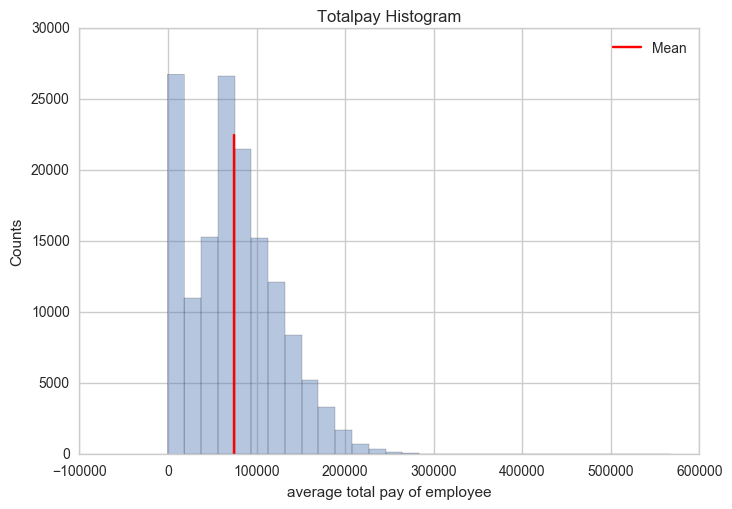

In [10]:
#Create Histogram for Totalpay
sns.set_context("notebook")
meanpay=df.TotalPay.mean()
#you can get means and medians in different ways
print meanpay, np.mean(df.TotalPay), df.TotalPay.median()
with sns.axes_style("whitegrid"):
    df.TotalPay.hist(bins=30, alpha=0.4);
    plt.axvline(meanpay, 0, 0.75, color='r', label='Mean')
    plt.xlabel("average total pay of employee")
    plt.ylabel("Counts")
    plt.title("Totalpay Histogram")
    plt.legend()

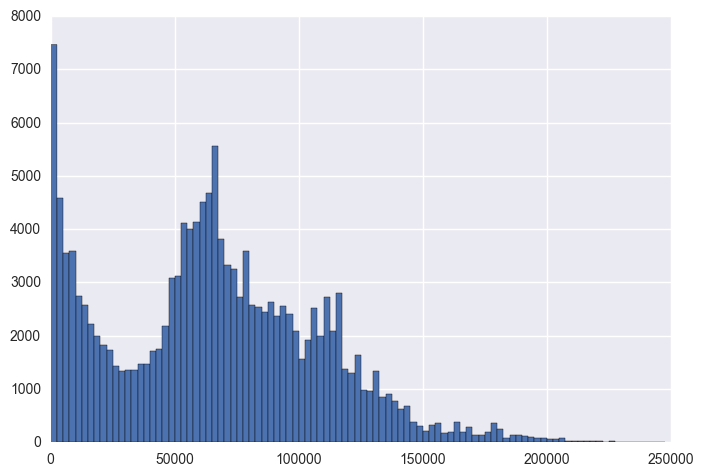

In [11]:
#Create Histogram for Basepay
df.BasePay.hist(bins=np.arange(0, 250000, 2500))

In [12]:
#Create subset of original dataset
df4 = pd.DataFrame()
df4['BasePay'] = df.BasePay
df4['OvertimePay'] = df.OvertimePay
df4['OtherPay'] = df.OtherPay
df4['TotalPay'] = df.TotalPay
df4['Benefits'] = df.Benefits
df4.head()

,BasePay,OvertimePay,OtherPay,TotalPay,Benefits
Id,,,,,
1,167411.18,0.00,400184.25,567595.43,NaN
2,155966.02,245131.88,137811.38,538909.28,NaN
3,212739.13,106088.18,16452.60,335279.91,NaN
4,77916.00,56120.71,198306.90,332343.61,NaN
5,134401.60,9737.00,182234.59,326373.19,NaN


In [13]:
#Drop rows with NULL
df4=df4.dropna()
df4.head()

,BasePay,OvertimePay,OtherPay,TotalPay,Benefits
Id,,,,,
36160,128808.87,220909.48,13126.31,362844.66,44430.12
36161,302578.00,0.00,18974.11,321552.11,69810.19
36162,111921.00,146415.32,78057.41,336393.73,53102.29
36163,296943.01,0.00,17816.59,314759.60,72047.88
36164,126863.19,192424.49,17917.18,337204.86,44438.25


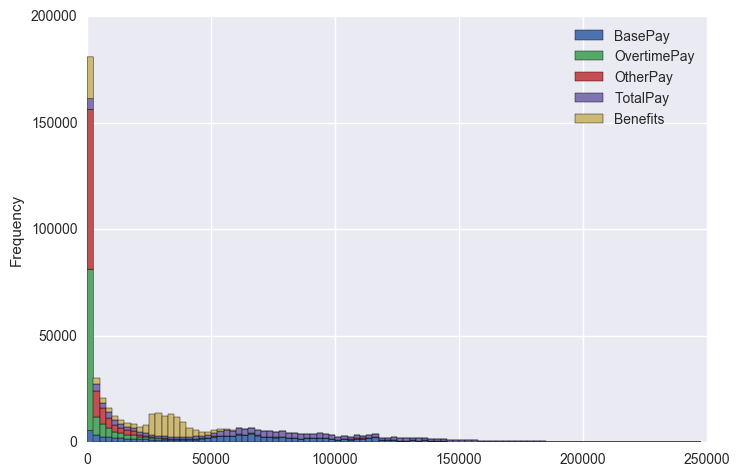

In [14]:
#Create stacked histogram
plt.figure()
df4.plot.hist(stacked=True, bins=np.arange(0, 250000, 2500))

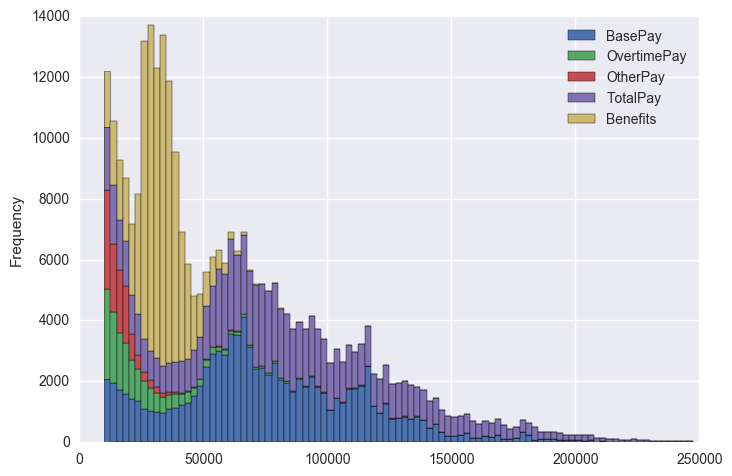

In [15]:
plt.figure()
df4.plot.hist(stacked=True, bins=np.arange(10000, 250000, 2500))

In [16]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
Id,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN


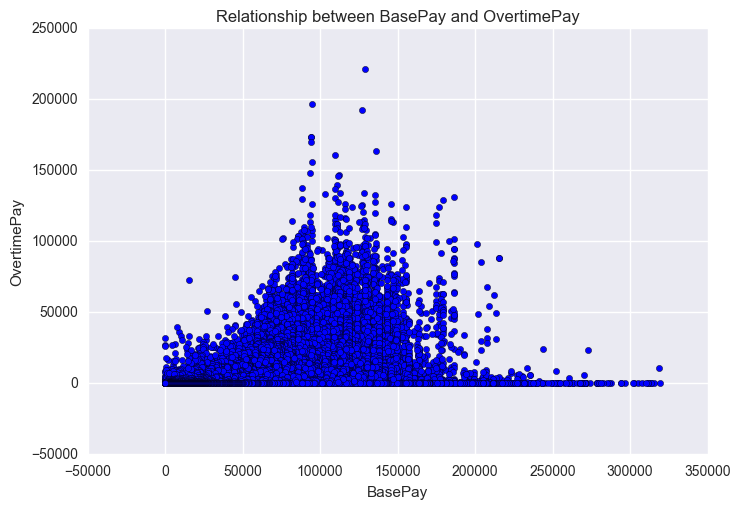

In [17]:
plt.scatter( df4.BasePay, df4.OvertimePay)
plt.xlabel("BasePay")
plt.ylabel("OvertimePay")
plt.title("Relationship between BasePay and OvertimePay")

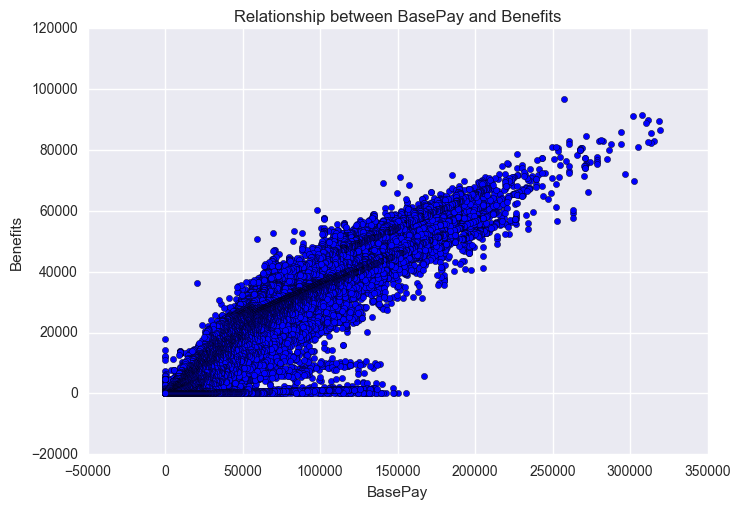

In [18]:
plt.scatter( df4.BasePay, df4.Benefits)
plt.xlabel("BasePay")
plt.ylabel("Benefits")
plt.title("Relationship between BasePay and Benefits")

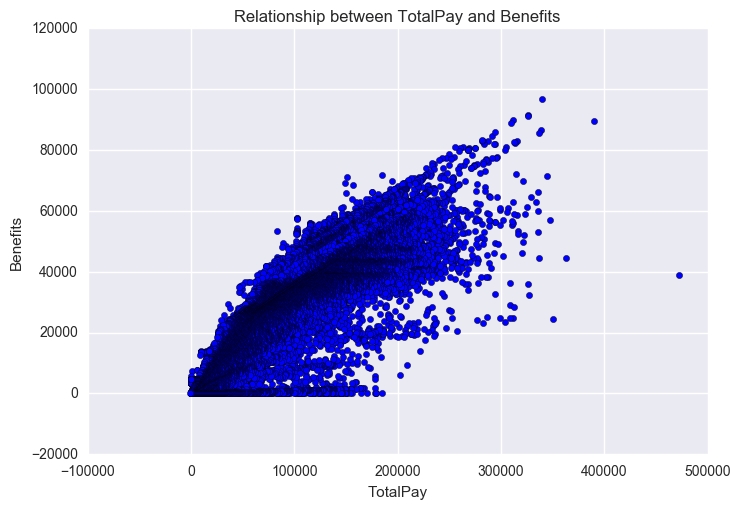

In [19]:
plt.scatter( df4.TotalPay, df4.Benefits)
plt.xlabel("TotalPay")
plt.ylabel("Benefits")
plt.title("Relationship between TotalPay and Benefits")

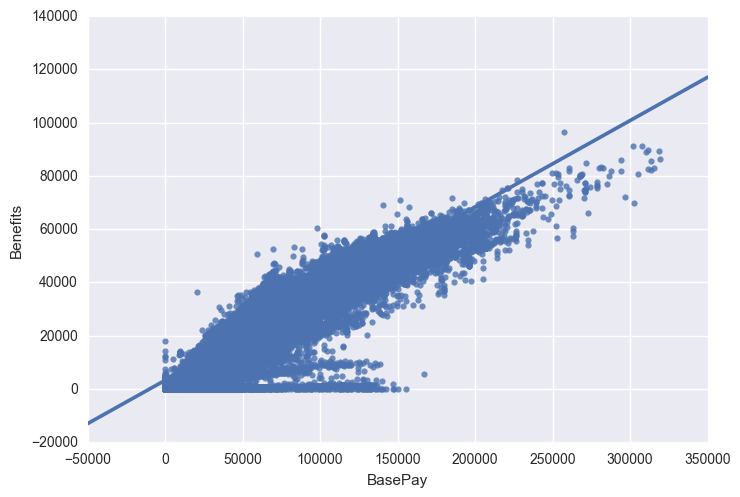

In [20]:
sns.regplot(y="Benefits", x="BasePay", data=df4, fit_reg = True)

# Part 2: Data Prediction - Linear regression
***

Here, 

$Y$ = San Francisco Benefits (also called "target" data in python)

and

$X$ = Base Pay (or independent variables)

which we will use to fit a linear regression model and predict San Francisco Benefits. We will use the least squares method as the way to estimate the coefficients.  

## Fitting Linear Regression using `sklearn`



In [21]:
from sklearn.linear_model import LinearRegression
X = df4.drop('Benefits', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
lm.fit(X, df4.Benefits)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print 'Estimated intercept coefficient:', lm.intercept_

Estimated intercept coefficient: 3194.34450986


In [24]:
print 'Number of coefficients:', len(lm.coef_)

Number of coefficients: 4


In [25]:
# The coefficients
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,BasePay,-2.025517e+12
1,OvertimePay,-2.025517e+12
2,OtherPay,-2.025517e+12
3,TotalPay,2.025517e+12


In [26]:
lm.predict(X)

array([  60177.87378463,  100074.69293641,   44433.16444562, ...,
          3194.34450986,    3194.34450986,    3240.61720473])

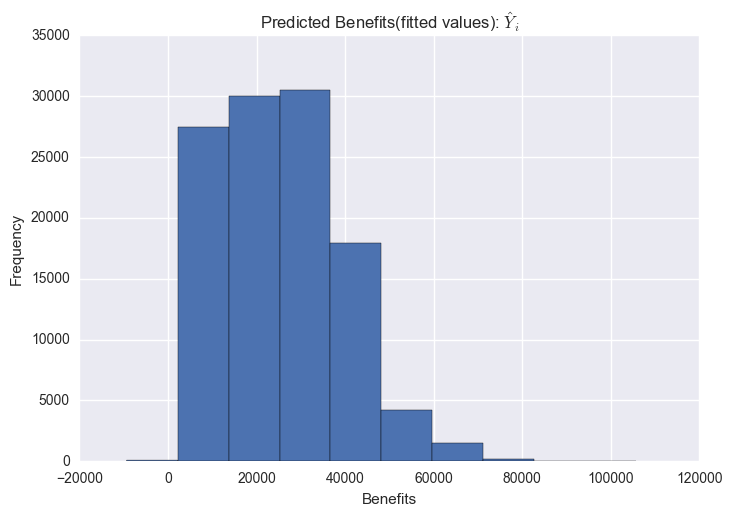

In [27]:
plt.hist(lm.predict(X))
plt.title('Predicted Benefits(fitted values): $\hat{Y}_i$')
plt.xlabel('Benefits')
plt.ylabel('Frequency')

Let's plot the true prices compared to the predicted prices to see they disagree, we saw this exactly befor but this is how you access the predicted values in using sklearn.


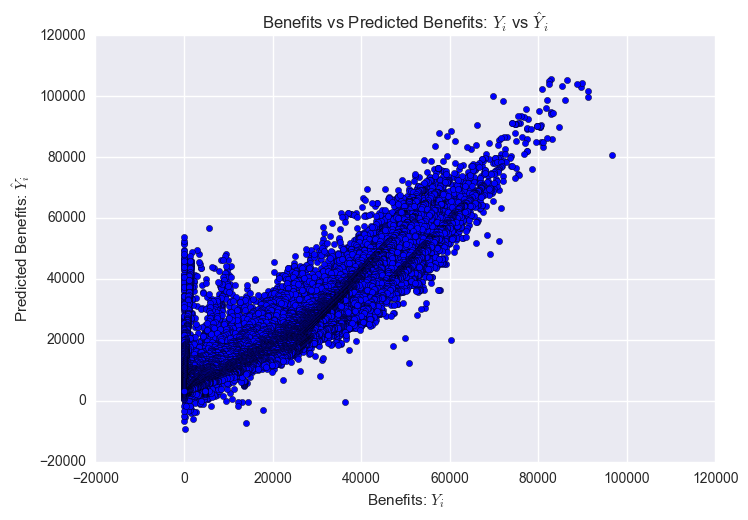

In [28]:
plt.scatter(df4.Benefits, lm.predict(X))
plt.xlabel("Benefits: $Y_i$")
plt.ylabel("Predicted Benefits: $\hat{Y}_i$")
plt.title("Benefits vs Predicted Benefits: $Y_i$ vs $\hat{Y}_i$")

### Residual sum of squares

Let's calculate the residual sum of squares 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [29]:
print np.sum((df4.Benefits - lm.predict(X)) ** 2)

4.06388439797e+12


### Mean squared error

In [30]:
mseFull = np.mean((df4.Benefits - lm.predict(X)) ** 2)
print mseFull

36321652.378


## Relationship between `BasePay` and benefits
***

Try fitting a linear regression model using only the 'BasePay' 

Calculate the mean squared error. 



In [31]:
lm = LinearRegression()
lm.fit(X[['BasePay']], df4.Benefits)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
mseBasePay = np.mean((df4.Benefits - lm.predict(X[['BasePay']])) ** 2)
print mseBasePay

37155541.9789


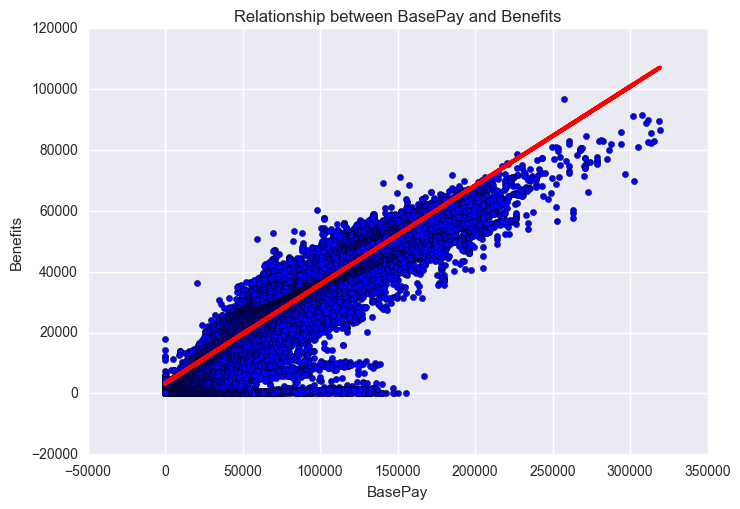

In [33]:
#We can also plot the fitted linear regression line.
plt.scatter(df4.BasePay, df4.Benefits)
plt.xlabel("BasePay")
plt.ylabel("Benefits")
plt.title("Relationship between BasePay and Benefits")

plt.plot(df4.BasePay, lm.predict(X[['BasePay']]), color='red', linewidth=3)
plt.show()

## Fitting Linear Regression using `statsmodels`

In [34]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [35]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('Benefits ~ BasePay',df4).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:               Benefits   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.997e+05
Date:                Tue, 27 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:20:13   Log-Likelihood:            -1.1339e+06
No. Observations:              111886   AIC:                         2.268e+06
Df Residuals:                  111884   BIC:                         2.268e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3268.9496     33.583     97.340      0.0

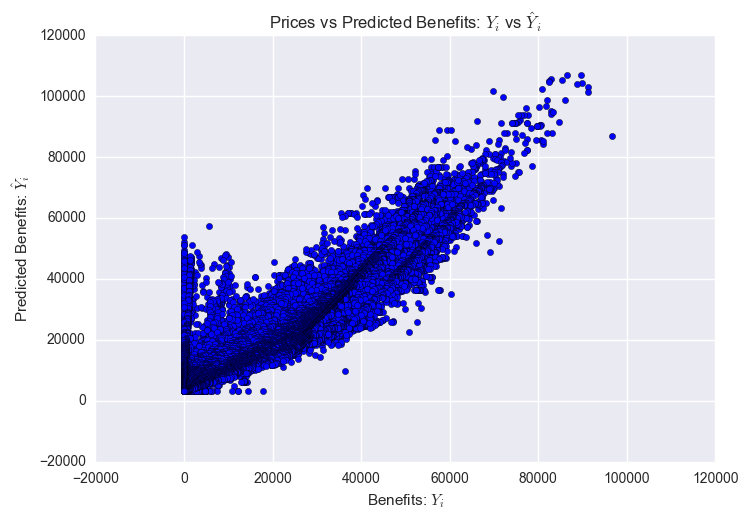

In [36]:
plt.scatter(df4['Benefits'], m.fittedvalues)
plt.xlabel("Benefits: $Y_i$")
plt.ylabel("Predicted Benefits: $\hat{Y}_i$")
plt.title("Prices vs Predicted Benefits: $Y_i$ vs $\hat{Y}_i$")

# Part 3: Split Training and Test Datasets

In [37]:
X_train = X[:-10000]
X_test = X[-10000:]
Y_train = df4.Benefits[:-10000]
Y_test = df4.Benefits[-10000:]
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(101886, 4)
(10000, 4)
(101886,)
(10000,)


In [38]:
#Let's build a linear regression model using our new training data sets.
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

calculate the mean squared error using just the test data and compare to mean squared from using all the data to fit the model.

In [39]:
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 36266688.2062
Fit a model X_train, and calculate MSE with X_test, Y_test: 43989000.4909


## Residual plots

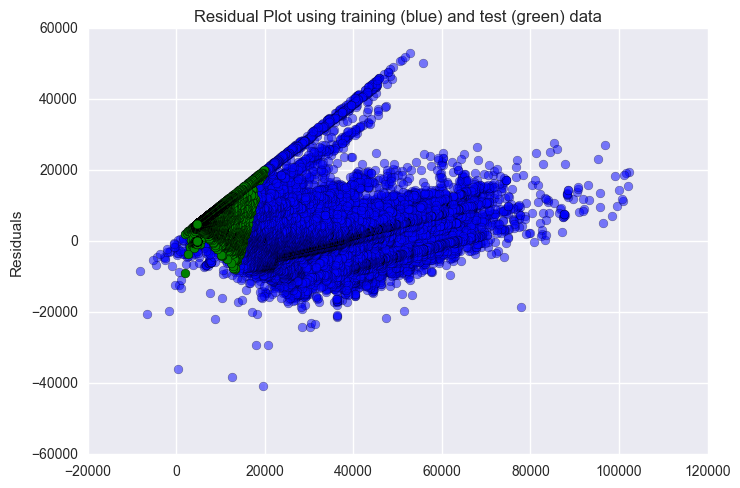

In [40]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')